In [1]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
from ast import literal_eval
import shutil

output_folder = '../output/'

fontsize = 28
labelsize = 20

In [2]:
df = pd.read_csv(output_folder + "propagation_result.csv", header=None)
# df.columns = ['dataset', 'p', 'algo',  'exp','result','timestep_results', 'intervention_results']
# df = pd.read_csv(output_folder + "server/propagation_result_final.csv", header=None)
df.columns = ['algo', 'dataset', 'exp', 'intervention_results', 'max propagation time', 'p', 'result', 'timestep_results']
print(df.shape)
df.head(15)

(4, 8)


,algo,dataset,exp,intervention_results,max propagation time,p,result,timestep_results
0,naive_nbr,enron,sir,NaN,1.0,0.3,"{24: [(12, 26), (19, 66), (11, 24), (15, 55), ...",NaN
1,naive_nbr,dblp,sir,NaN,1.0,0.3,"{279: [(86, 284), (77, 284), (91, 284), (91, 2...",NaN
2,naive_degree,dblp,sir,NaN,1.0,0.3,"{13: [(11, 28), (21, 48), (14, 33), (14, 37), ...",NaN
3,naive_nbr,dblp,sir_kd,NaN,1.0,0.3,"{(279, 1): [(85, 284), (79, 284), (82, 284), (...",NaN


In [3]:
import seaborn as sns 
# from matplotlib.ticker import MaxNLocator
# sns.set(rc={'figure.figsize':(7,4)})
# sns.set_style("whitegrid", {'axes.grid' : True})
sns.set(rc={'figure.figsize':(8,4)})
# sns.set_style("whitegrid", {'axes.grid' : True})
sns.set_style("ticks")
plt.style.use('grayscale')
lw = 3
save = False

goodname_algo = {
        'naive_nbr': 'nbr-based hyp.'
    }
df2 = df[df['exp']=='sir'].copy()
datasets = df['dataset'].unique()
for key in datasets:
    print(key)
    item = df2[df2.dataset==key].copy()
    if len(item) == 0:
        continue
    item['algo'] = item['algo'].replace(goodname_algo)
    result_df = pd.DataFrame()
    for algo in item['algo'].unique():
        assert item[item['algo'] == algo].shape[0] == 1
        result = literal_eval(item[item['algo'] == algo]['result'].iloc[0])
        result = [(k, v, algo) for k in result for v in result[k]]
        result_df = result_df.append(pd.DataFrame(result, columns = ['core number', 'infected', 'algo']), ignore_index=False)
        # print(result_df) 
    # print(result_df)
    #Plot mean
    meandf = result_df.groupby(['core number', 'algo']).mean().reset_index()
    # print(meandf)
    fig, ax = plt.subplots()
    # sns.lineplot(x = 'core number', y = 'infected', hue='algo', hue_order = ['clique graph', 'nbr-based hyp.', 'deg-based hyp.'], 
    #                 data=meandf, color='k', linewidth = lw)
    sns.lineplot(x = 'core number', y = 'infected', hue='algo', label = None, data=meandf, color='k', linewidth = lw)
                    
    plt.xlabel('Core-number of seed nodes', fontsize=fontsize)
    plt.ylabel("#Infected nodes", fontsize=fontsize)
    plt.xticks(fontsize=fontsize)
    # plt.xticks()
    plt.yticks(fontsize=fontsize)
    ax.get_legend().remove()
    # handles, labels = ax.get_legend_handles_labels()
    # ax.legend(handles=handles[1:], labels=labels[1:], fontsize=fontsize)
    # plt.title(key)
    # ax.yaxis.set_major_locator(MaxNLocator(5))
    # ax.xaxis.set_major_locator(MaxNLocator(5)) 
    plt.tight_layout()
    filename = key
    if(save):
        plt.savefig("../fig/" + filename + "_infected.pdf")
        plt.show()
    else:
        print("../fig/" + filename + "_infected.pdf")
        plt.show()
    plt.clf()

enron


DataError: No numeric types to aggregate

## (k, d) core

In [8]:
import seaborn as sns 
# from matplotlib.ticker import MaxNLocator
# sns.set(rc={'figure.figsize':(7,4)})
# sns.set_style("whitegrid", {'axes.grid' : True})
sns.set(rc={'figure.figsize':(8,4)})
# sns.set_style("whitegrid", {'axes.grid' : True})
sns.set_style("ticks")
plt.style.use('grayscale')
lw = 3
save = True

goodname_algo = {
        'naive_nbr': 'nbr-based hyp.'
    }
df2 = df[df['exp']=='sir_kd'].copy()
datasets = df['dataset'].unique()
for key in datasets:
    print(key)
    item = df2[df2.dataset==key].copy()
    if len(item) == 0:
        continue
    item['algo'] = item['algo'].replace(goodname_algo)
    result_df = pd.DataFrame()
    for algo in item['algo'].unique():
        assert item[item['algo'] == algo].shape[0] == 1
        result = literal_eval(item[item['algo'] == algo]['result'].iloc[0])
        result = [(k[0], k[1], v, algo) for k in result for v in result[k]]
        result_df = result_df.append(pd.DataFrame(result, columns = ['k', 'd', 'infected', 'algo']), ignore_index=False)
        # print(result_df) 
    #Plot mean
    meandf = result_df.groupby(['k', 'd', 'algo']).mean().reset_index()
    # meandf['color'] = meandf.apply(lambda x: 1 - x['infected'], axis=1)
    print(meandf)
    meandf = meandf[meandf.groupby('k')['d'].transform('max') == meandf['d']]
    print()
    print(meandf)
    
    fig, ax = plt.subplots()
    # sns.lineplot(x = 'core number', y = 'infected', hue='algo', hue_order = ['clique graph', 'nbr-based hyp.', 'deg-based hyp.'], 
    #                 data=meandf, color='k', linewidth = lw)
    # sns.lineplot(x = 'core number', y = 'infected', hue='algo', label = None, data=meandf, color='k', linewidth = lw)
    # sns.heatmap(data=meandf[['k', 'd']],  cmap=meandf['infected'])               
    # plt.scatter(meandf['k'], meandf['d'], s=100, c=meandf['infected'], cmap='Greens')
    sns.lineplot(x='k', y='infected', palette='colorblind', data=meandf)
    # plt.colorbar()
    plt.xlabel('k', fontsize=fontsize)
    plt.ylabel("#infected nodes", fontsize=fontsize)
    plt.xticks(fontsize=fontsize)
    # plt.xticks()
    plt.yticks(fontsize=fontsize)
    plt.tight_layout()
    filename = key
    if(save):
        plt.savefig("../fig/" + filename + "_infected_kd.pdf")
        plt.show()
    else:
        print("../fig/" + filename + "_infected.pdf")
        plt.show()
    plt.clf()

default


AssertionError: 

In [5]:
import seaborn as sns 
from matplotlib.ticker import MaxNLocator
sns.set(rc={'figure.figsize':(8,4)})
sns.set_style("ticks")
plt.style.use('grayscale')
save = True

ignore_datasets = ['bin_1','bin_2','bin_4','bin_5', 'congress', 'contact']
only_algo = ['enron']
group_list = ['algo', 'dataset', 'p']
# group_list = ['algo',  'p']
df2 = df[df['exp']=='sir_exp2'].copy()
for key in df2.dataset.unique():
    # there should be only one result
    item = df2[df2.dataset == key].copy()
    assert item.shape[0] == 1
    if item['dataset'].values[0] in ignore_datasets:
        continue
    
    
    
    result = literal_eval(item['timestep_results'].iloc[0])
    result = [(k, v) for k in result for v in result[k]]
    result_df = pd.DataFrame(result, columns = ['core number', 'timestep of infection'])
    
    
    sns.lineplot(x = 'core number', y = 'timestep of infection',  data=result_df, color = 'k', linewidth = lw)
    plt.xlabel('Core-number of Infected nodes', fontsize=fontsize)
    plt.ylabel("Infection time", fontsize=fontsize)
    plt.xticks(fontsize=fontsize)
    # plt.xticks()
    plt.yticks(fontsize=fontsize)
    ax.yaxis.set_major_locator(MaxNLocator(5))
    # ax.xaxis.set_major_locator(MaxNLocator(5)) 
    # plt.title(goodname_algo[key[0]], fontsize=fontsize)
    plt.tight_layout()
    #  Add redline on the MAX_ITERATION
    filename = key
    if(save):
        plt.savefig("../fig/" + filename + "_firstinf.pdf")
        plt.show()
    else:
        print("../fig/" + filename + "_firstinf.pdf")
        plt.show()
        # break
    plt.clf()

In [6]:
df_nbr = pd.read_csv("../output/propagation_result_recursive_delinner_enron_naive_nbr3.csv", header=None)
df_nbr.columns = ['dataset', 'p', 'algo', 'exp', 'result', 'timestep_results', 'intervention_results', 'num delete']
df_nbr.head()

,dataset,p,algo,exp,result,timestep_results,intervention_results,num delete
0,enron,0.3,naive_nbr,sir_exp3,NaN,NaN,"{0: {24: [3626, 3621, 3632, 3643, 3635, 3588, ...",10
1,enron,0.3,naive_nbr,sir_exp3,NaN,NaN,"{0: {24: [3635, 3601, 3611, 3611, 3658, 3634, ...",18


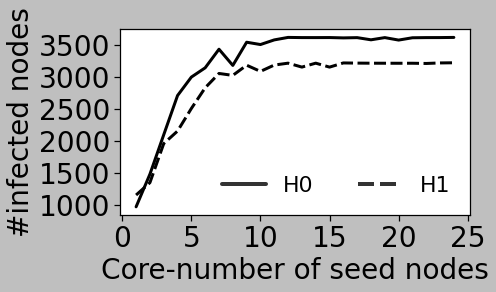

<Figure size 504x288 with 0 Axes>

In [7]:
import pandas as pd
import seaborn as sns 
from ast import literal_eval
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os

sns.set(rc={'figure.figsize':(7,4)})
sns.set_style("ticks")
plt.style.use('grayscale')
save = True

# plt.rcParams["font.family"] = "serif"
# plt.rcParams['text.usetex'] = True


# fontsize = 28
# labelsize = 12


# from matplotlib.ticker import MaxNLocator
# sns.set(rc={'figure.figsize':(7,4)})
# sns.set_style("whitegrid", {'axes.grid' : True})
# plt.rcParams['figure.figsize'] = (8, 4)
lw = 3
save = True
topk = 5 

ignore_datasets = ['bin_1','bin_2','bin_4','bin_5', 'congress', 'contact']
group_list = ['dataset', 'p', 'algo']
goodname_algo = {
        'graph_core': 'clique graph',
        'naive_nbr': 'nbr-based hyp.',
        'naive_degree': 'deg-based hyp.'
    }

# df = pd.read_csv(os.path.join("data/output/propagation_result_topk_exp3.csv"), header=None)
# df.columns = ['dataset', 'p', 'algo', 'exp', 'result', 'timestep_results', 'intervention_results']
# print(df.shape)
# print(df.head(10))
df2 = df_nbr[df_nbr['exp']=='sir_exp3'].copy()
for key in df2.dataset.unique():
    # there should be only one result
    item = df2[df2.dataset == key].copy()
    item['algo'] = item['algo'].replace(goodname_algo)
    assert len(item['algo'].unique()) == 1
    
    result = literal_eval(item['intervention_results'].iloc[0])
    # print(result.keys())
    # print(result['top5'].keys())
    # print(len(result['top5'][1]))
    # for top_val in ['top5', 'top10', 'top15']:
    # print(['nill', top_val])
    
    
    result_df = pd.DataFrame()
    result_tuple = [('H'+str(hypergraph_id), k, v) for hypergraph_id in sorted(list(result.keys()))[:topk] \
                    for k in result[hypergraph_id] for v in result[hypergraph_id][k]]
    result_df = result_df.append(pd.DataFrame(result_tuple, columns = ['hypergraph', 'core number', 'infected']), \
                                 ignore_index=False)
    # print(result_df['edge id'].unique())
    # result_df['intervention'] = result_df.apply(lambda x: 'applied' if x['edge id'] != 'nill' else 'not applied', axis=1)

    #Plot mean
    meandf = result_df.groupby(['hypergraph', 'core number']).mean().reset_index()
    # print(meandf.head(n = 10))
    # print(meandf)
    sns.lineplot(x = 'core number', y = 'infected', lw= lw, style = 'hypergraph',  data=meandf)
    
    plt.xlabel('Core-number of seed nodes', fontsize=fontsize)
    plt.ylabel("#infected nodes", fontsize=fontsize)
    # plt.yscale("log")
    plt.xticks(fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    # plt.title(goodname_algo[key[2]], fontsize=fontsize)
    leg = plt.legend(loc='best', fontsize=fontsize-6, ncol=2, frameon=False)
    
    for legobj in leg.legendHandles:
        legobj.set_linewidth(4.0)

    plt.tight_layout()
    filename = key
    if(save):
        plt.savefig("../fig/" + filename + "_innercoreImpact.pdf")
        plt.show()
    else:
        print("../fig/" + filename + "_innercoreImpact.pdf")
        plt.show()
        # break 
    plt.clf()


In [8]:
from hgDecompose.utils import load_dict 
d = load_dict()

Loading dictionary from:  tests/tmp/temp.pkl


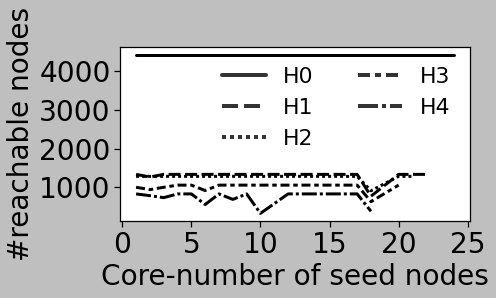

<Figure size 504x288 with 0 Axes>

In [9]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
import seaborn as sns
sns.set(rc={'figure.figsize':(7,4)})
sns.set_style("ticks")
plt.style.use('grayscale')

lw = 3
save = True
output_folder = '../fig/'

int_dict = {'core number': [], 'Avg. conn. component size':[], 'hypergraph id': []}
for k, d2 in d.items():
    # print(k)
    if k>=5:
        break
    x = [] 
    y = []
    for k3,d3 in d2.items():
        # print('=>',k3,' : ',d3)
        mean = np.mean(list(d3.values()))
        # print()
        x.append(k3)
        y.append(mean)
    # plt.plot(x,y,label='H'+str(k))
    int_dict['core number']+= x
    int_dict['Avg. conn. component size']+=y
    int_dict['hypergraph id']+= ['H'+str(k)]*len(x)
    # print('------')
    # mean2  = np.mean(y)
    # print(k,mean2)

result_df = pd.DataFrame.from_dict(int_dict)

# result_df.head()
sns.lineplot(x = 'core number', y = 'Avg. conn. component size', lw=lw, style = 'hypergraph id',  data=result_df)
# plt.yscale('log')
plt.ylabel('#reachable nodes', fontsize=fontsize)
plt.xlabel('Core-number of seed nodes', fontsize=fontsize)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
leg = plt.legend(loc='best', fontsize=fontsize-6, ncol=2, frameon=False)
for legobj in leg.legendHandles:
        legobj.set_linewidth(4.0)
plt.tight_layout()
filename = 'Explain_enron'
if(save):
    plt.savefig(output_folder + filename + "_innercoreImpact.pdf")
    plt.show()
else:
    print(output_folder + filename + "_innercoreImpact.pdf")
    plt.show()
    # break 
plt.clf()

In [4]:

src = '../output/'
cols = ['algo', 'dataset', 'exp', 'intervention_results', 'num delete', 'p', 'result', 'timestep_results']
# cols = ['dataset', 'p', 'algo', 'exp', 'result', 'timestep_results', 'intervention_results', 'num delete']
# cols = ['dataset', 'p', 'algo', 'exp', 'result', 'timestep_results', 'intervention_results']

df_nbr = pd.read_csv(src+"propagation_result_recursive_delinner_enron_naive_nbr3.csv", header=None)
df_nbr.columns = cols

df_degree = pd.read_csv(src+"propagation_result_recursive_delinner_enron_naive_degree3.csv", header=None)
df_degree.columns = cols

df_graph_core = pd.read_csv(src+"propagation_result_recursive_delinner_enron_graph_core3.csv", header=None)
df_graph_core.columns = cols

df = pd.concat([df_nbr, df_degree, df_graph_core])
df.head(n=10)

,algo,dataset,exp,intervention_results,num delete,p,result,timestep_results
0,naive_nbr,enron,sir_exp3,"{0: {24: [3624, 3594, 3627, 3610, 3619, 3591, ...",10.0,0.3,NaN,NaN
1,naive_nbr,enron,sir_exp3,"{0: {24: [3613, 3625, 3597, 3624, 3580, 3609, ...",18.0,0.3,NaN,NaN
0,naive_degree,enron,sir_exp3,"{0: {11: [3595, 3667, 3666, 3606, 3637, 3629, ...",10.0,0.3,NaN,NaN
1,naive_degree,enron,sir_exp3,"{0: {11: [3627, 3639, 3640, 3632, 3627, 3601, ...",18.0,0.3,NaN,NaN
0,graph_core,enron,sir_exp3,"{0: {40: [3627, 3591, 3654, 3655, 3605, 3614, ...",10.0,0.3,NaN,NaN
1,graph_core,enron,sir_exp3,"{0: {40: [3599, 3608, 3619, 3616, 3611, 3605, ...",18.0,0.3,NaN,NaN


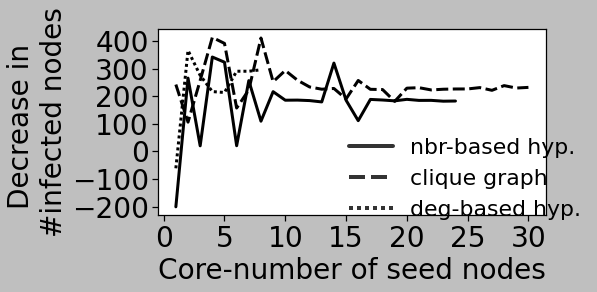

<Figure size 576x288 with 0 Axes>

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from ast import literal_eval
%matplotlib inline
sns.set(rc={'figure.figsize':(8,4)})
sns.set_style("whitegrid", {'axes.grid': False})
sns.set_style("ticks")
plt.style.use('grayscale')

# from matplotlib.ticker import MaxNLocator
# sns.set(rc={'figure.figsize': (7, 4)})
# plt.rcParams['figure.figsize'] = (7,5)


lw = 3
save = True
output_folder = '../fig/'
topk = 5

ignore_datasets = ['bin_1', 'bin_2', 'bin_4',
                   'bin_5', 'congress', 'contact']
group_list = ['dataset', 'p', 'algo']
goodname_algo = {
    'graph_core': 'clique graph',
    'naive_nbr': 'nbr-based hyp.',
    'naive_degree': 'deg-based hyp.'
}
order = [goodname_algo[a] for a in ['naive_nbr','graph_core', 'naive_degree']]
df_plot = None

for key, item in df[df['intervention_results'].notnull()].groupby(group_list, as_index=False):

    item['algo'] = item['algo'].replace(goodname_algo)
    assert len(item['algo'].unique()) == 1

    result = literal_eval(item['intervention_results'].iloc[0])

    result_df = pd.DataFrame()
    result_tuple = [('H'+str(hypergraph_id), k, v) for hypergraph_id in sorted(list(result.keys()))[:topk]
                    for k in result[hypergraph_id] for v in result[hypergraph_id][k]]
    result_df = result_df.append(pd.DataFrame(result_tuple, columns=[
                                 'hypergraph', 'core number', 'infected']), ignore_index=False)
    # Plot mean
    meandf = result_df.groupby(
        ['hypergraph', 'core number']).mean().reset_index()

    merged_df = pd.merge(meandf[meandf['hypergraph'] == "H0"], meandf[meandf['hypergraph'] == "H1"],
                         how="right", on=["core number"])
    merged_df['infected difference'] = merged_df.apply(
        lambda x: x['infected_x'] - x['infected_y'], axis=1)
    merged_df['Decomposition'] = goodname_algo[key[2]]

    merged_df.drop(['infected_x', 'infected_y', 'hypergraph_x', 'hypergraph_y'], axis=1, inplace=True)

    # print(merged_df)

    if(df_plot is None):
        df_plot = merged_df.copy()
    else:
        df_plot = df_plot.append(merged_df,ignore_index=True)

# print(df_plot.head(10))    
sns.lineplot(x = 'core number', y = 'infected difference', style='Decomposition', lw=lw, data=df_plot,style_order = order)
plt.xlabel('Core-number of seed nodes', fontsize=fontsize)
plt.ylabel("Decrease in \n#infected nodes", fontsize=fontsize)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
leg = plt.legend(loc="best", fontsize=fontsize-6,frameon=False,bbox_to_anchor=(0.44,0.52))
for legobj in leg.legendHandles:
        legobj.set_linewidth(4.0)

plt.tight_layout()
filename = key[0] + "_diff_btn_H0_and_H1"
if(save):
    plt.savefig(output_folder + filename + ".pdf")
    plt.show()
else:
    print(filename)
    plt.show()
    # break
plt.clf()

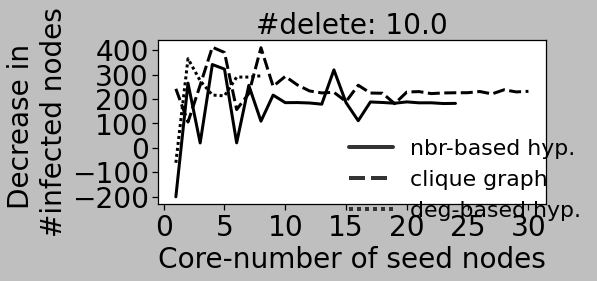

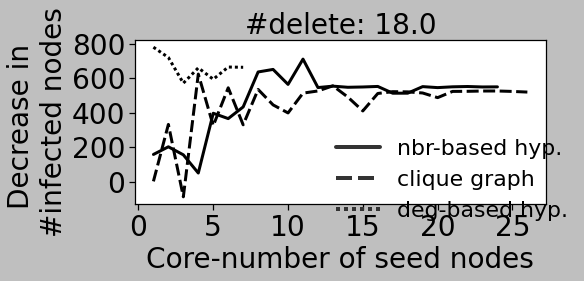

<Figure size 576x288 with 0 Axes>

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from ast import literal_eval

for num_delete in df['num delete'].unique():
    %matplotlib inline
    sns.set(rc={'figure.figsize':(8,4)})
    sns.set_style("whitegrid", {'axes.grid': False})
    sns.set_style("ticks")
    plt.style.use('grayscale')

    # from matplotlib.ticker import MaxNLocator
    # sns.set(rc={'figure.figsize': (7, 4)})
    # plt.rcParams['figure.figsize'] = (7,5)


    lw = 3
    save = True
    output_folder = '../fig/'
    topk = 5

    ignore_datasets = ['bin_1', 'bin_2', 'bin_4',
                    'bin_5', 'congress', 'contact']
    group_list = ['dataset', 'p', 'algo']
    goodname_algo = {
        'graph_core': 'clique graph',
        'naive_nbr': 'nbr-based hyp.',
        'naive_degree': 'deg-based hyp.'
    }
    order = [goodname_algo[a] for a in ['naive_nbr','graph_core', 'naive_degree']]
    df_plot = None

    for key, item in df[(df['intervention_results'].notnull()) & (df['num delete'] == num_delete)].groupby(group_list, as_index=False):

        # print(key)
        # print(item)
        # continue
    
        item['algo'] = item['algo'].replace(goodname_algo)
        assert len(item['algo'].unique()) == 1

        result = literal_eval(item['intervention_results'].iloc[0])

        result_df = pd.DataFrame()
        result_tuple = [('H'+str(hypergraph_id), k, v) for hypergraph_id in sorted(list(result.keys()))[:topk]
                        for k in result[hypergraph_id] for v in result[hypergraph_id][k]]
        result_df = result_df.append(pd.DataFrame(result_tuple, columns=[
                                    'hypergraph', 'core number', 'infected']), ignore_index=False)
        # Plot mean
        meandf = result_df.groupby(
            ['hypergraph', 'core number']).mean().reset_index()

        merged_df = pd.merge(meandf[meandf['hypergraph'] == "H0"], meandf[meandf['hypergraph'] == "H1"],
                            how="right", on=["core number"])
        merged_df['infected difference'] = merged_df.apply(
            lambda x: x['infected_x'] - x['infected_y'], axis=1)
        merged_df['Decomposition'] = goodname_algo[key[2]]

        merged_df.drop(['infected_x', 'infected_y', 'hypergraph_x', 'hypergraph_y'], axis=1, inplace=True)

        # print(merged_df)

        if(df_plot is None):
            df_plot = merged_df.copy()
        else:
            df_plot = df_plot.append(merged_df,ignore_index=True)

    # # print(df_plot.head(10))    
    sns.lineplot(x = 'core number', y = 'infected difference', style='Decomposition', lw=lw, data=df_plot,style_order = order)
    plt.xlabel('Core-number of seed nodes', fontsize=fontsize)
    plt.ylabel("Decrease in \n#infected nodes", fontsize=fontsize)
    plt.xticks(fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    plt.title("#delete: " + str(num_delete), fontsize=fontsize)
    leg = plt.legend(loc="best", fontsize=fontsize-6,frameon=False,bbox_to_anchor=(0.44,0.52))
    for legobj in leg.legendHandles:
            legobj.set_linewidth(4.0)

    plt.tight_layout()
    filename = key[0] + "_diff_btn_H0_and_H1"
    if(save):
        plt.savefig(output_folder + filename + ".pdf")
        plt.show()
    else:
        print(filename)
        plt.show()
        # break
    plt.clf()

In [ ]:
# 1. intersection of all methods
# 2. multiple runs
# 3. from (k, d) decomposition

../output/enron_naive_nbr_sp4.pkl
1
22
../output/enron_graph_core_sp4.pkl
1
25
../output/enron_naive_degree_sp4.pkl
1
7


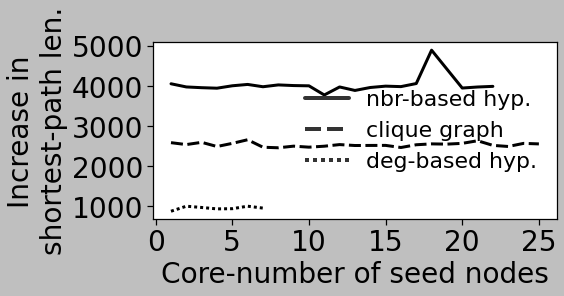

../output/enron_naive_nbr_comp4.pkl
1
22
../output/enron_graph_core_comp4.pkl
1
25
../output/enron_naive_degree_comp4.pkl
1
7


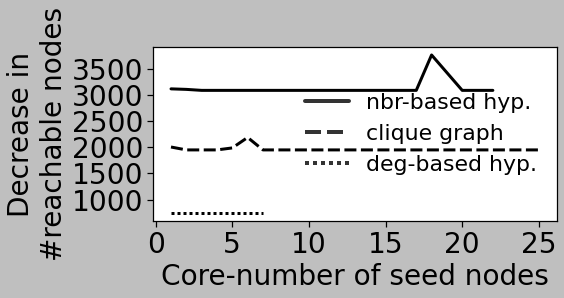

<Figure size 576x288 with 0 Axes>

In [12]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(rc={'figure.figsize':(8,4)})
sns.set_style("whitegrid", {'axes.grid': False})
sns.set_style("ticks")
plt.style.use('grayscale')
# plt.rcParams["font.family"] = "serif"
# plt.rcParams['text.usetex'] = True


# fontsize = 28
# labelsize = 12
save = True
good_name_y = {
    "sp" : "\nshortest-path len.", 
    "comp" : "\n#reachable nodes"
}
dataset_name = 'enron'
upper_bound = {
    "sp" : 100, 
    "comp" : 4423
}

goodname_algo = {
    'graph_core': 'clique graph',
    'naive_nbr': 'nbr-based hyp.',
    'naive_degree': 'deg-based hyp.'
}
order = [goodname_algo[a] for a in ['naive_nbr','graph_core', 'naive_degree']]
# plt.rcParams['figure.figsize'] = (7,5)

# for file_extension in ["comp","sp"][-1:]:
for file_extension in ['sp', "comp"]:
    # print(file_extension)
    df_plot = None 
    for algo in ['naive_nbr','graph_core', 'naive_degree']:
        file = open("../output/"+dataset_name+"_" + algo + "_" + file_extension + "4.pkl", "rb")
        print("../output/"+dataset_name+"_" + algo + "_" + file_extension + "4.pkl")
        result = pickle.load(file)
        topk = 5 # what is the meaning of this?
        result_df = pd.DataFrame()
        # result_tuple = [('H'+str(hypergraph_id), k, v) for hypergraph_id in sorted(list(result.keys()))[:topk] for k in result[hypergraph_id] for v in result[hypergraph_id][k]]
        result_tuple = [('H'+str(hypergraph_id), k,result[hypergraph_id][k]) for hypergraph_id in sorted(list(result.keys()))[:topk] for k in result[hypergraph_id] ]
        # if (file_extension=='sp'):
        #     print(result_tuple)

        result_df = result_df.append(pd.DataFrame(result_tuple, columns = ['hypergraph', 'core number', good_name_y[file_extension]]), ignore_index=False)
        # if (file_extension == 'sp'):
        #     print(result_df)

        result_df[good_name_y[file_extension]] = result_df[good_name_y[file_extension]].apply(pd.to_numeric)
        
        # Handle infinity path length
        # if file_extension=='sp':
            # result_df[good_name_y[file_extension]] = result_df[good_name_y[file_extension]].apply(lambda x: [upper_bound[file_extension],x][x <= upper_bound[file_extension]] ) 
        
        print(result_df[result_df['hypergraph'] == "H0"]['core number'].min())
        # print()
        print(result_df[result_df['hypergraph'] == "H1"]['core number'].max())
        merged_df = pd.merge(result_df[result_df['hypergraph'] == "H0"], result_df[result_df['hypergraph'] == "H1"],
                         how="inner", on=["core number"])
        # print(merged_df)
        if file_extension == 'sp':
                merged_df['difference'] = merged_df.apply(
                lambda x:  x[good_name_y[file_extension]+'_y'] - x[good_name_y[file_extension]+'_x'], axis=1)
        else:
            merged_df['difference'] = merged_df.apply(
                lambda x: x[good_name_y[file_extension]+'_x'] - x[good_name_y[file_extension]+'_y'], axis=1)
        merged_df['Decomposition'] = goodname_algo[algo]

        merged_df.drop([good_name_y[file_extension]+'_x', good_name_y[file_extension]+'_y', 'hypergraph_x', 'hypergraph_y'], axis=1, inplace=True)
        
        if(df_plot is None):
            df_plot = merged_df.copy()
        else:
            df_plot = df_plot.append(merged_df,ignore_index=True)


        # meandf = result_df.groupby(['hypergraph', 'core number']).mean().reset_index()
        # # print(meandf)
       
        # # sns.lineplot(x = 'core number', y = good_name_y[file_extension], hue = 'hypergraph', palette='colorblind', data=meandf)
        # sns.lineplot(x = 'core number', y = good_name_y[file_extension], hue = 'hypergraph', palette='colorblind', data=result_df)
        # # plt.yscale("log")
        # plt.xlabel('Core number', fontsize=fontsize)
        # plt.ylabel(good_name_y[file_extension], fontsize=fontsize)
        # plt.xticks(fontsize=fontsize)
        # plt.yticks(fontsize=fontsize)
        # plt.title(goodname_algo[algo], fontsize=fontsize)
        # plt.tight_layout()

        # # filename = (" ".join(map(str, key)) + " propagation").replace(" ", "_").replace(".", "")
        # filename = dataset_name+"_" + algo + "_" + file_extension
        # # print(filename)
        # if(save):
        #     plt.savefig("data/output/fig/" + filename + "_explain.pdf")
        # else:
        #     print(filename)
        #     plt.show()

        # plt.clf()
    # print(df_plot)
    # sns.lineplot(x = 'core number', y = 'difference', hue='Decomposition', lw=3, palette='bright', data=df_plot)
    sns.lineplot(x = 'core number', y = 'difference', style='Decomposition', lw=lw, data=df_plot,style_order = order)
    plt.xlabel('Core-number of seed nodes', fontsize=fontsize)
    if file_extension == 'sp':
        plt.ylabel("Increase in"+good_name_y[file_extension], fontsize=fontsize)
    else:
        plt.ylabel("Decrease in"+good_name_y[file_extension], fontsize=fontsize)
    plt.xticks(fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    leg = plt.legend(loc="center right", ncol=1, fontsize=fontsize-6, frameon=False)
    for legobj in leg.legendHandles:
        legobj.set_linewidth(4.0)
    # plt.grid()
    plt.tight_layout()
    filename = dataset_name + "_" + file_extension
    if(save):
        plt.savefig(output_folder + filename + "_diff.pdf")
        plt.show()
    else:
        print(filename)
        plt.show()
        # break
    plt.clf()

# New code by Bishwa

In [1]:
import shutil
from ast import literal_eval
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

output_folder = '../output/'

fontsize = 28
labelsize = 20


In [2]:
dataset = "enron"
src = '../output/'
cols = ['algo', 'dataset', 'exp', 'intervention_results',
        'num delete', 'p', 'result', 'timestep_results']
# cols = ['dataset', 'p', 'algo', 'exp', 'result', 'timestep_results', 'intervention_results', 'num delete']
# cols = ['dataset', 'p', 'algo', 'exp', 'result', 'timestep_results', 'intervention_results']

df_nbr = pd.read_csv(
    src + "propagation_result_recursive_delinner_" + dataset + "_naive_nbr3.csv", header=None)
df_nbr.columns = cols

df_degree = pd.read_csv(
    src + "propagation_result_recursive_delinner_" + dataset + "_naive_degree3.csv", header=None)
df_degree.columns = cols

df_graph_core = pd.read_csv(
    src + "propagation_result_recursive_delinner_" + dataset + "_graph_core3.csv", header=None)
df_graph_core.columns = cols

df = pd.concat([df_nbr, df_degree, df_graph_core])
df.head(n=10)


,algo,dataset,exp,intervention_results,num delete,p,result,timestep_results
0,naive_nbr,enron,sir_exp3,"{0: {24: [3624.0, 3633.0, 3619.6, 3611.8, 3615...",10.0,0.3,NaN,NaN
1,naive_nbr,enron,sir_exp3,"{0: {24: [3616.4, 3602.8, 3626.0, 3619.4, 3628...",18.0,0.3,NaN,NaN
0,naive_degree,enron,sir_exp3,"{0: {11: [3614.6, 3626.4, 3640.4, 3629.2, 3629...",10.0,0.3,NaN,NaN
1,naive_degree,enron,sir_exp3,"{0: {11: [3597.0, 3614.0, 3623.8, 3629.8, 3631...",18.0,0.3,NaN,NaN
0,graph_core,enron,sir_exp3,"{0: {40: [3630.4, 3625.4, 3627.2, 3622.8, 3614...",10.0,0.3,NaN,NaN
1,graph_core,enron,sir_exp3,"{0: {40: [3627.4, 3615.4, 3622.2, 3612.8, 3618...",18.0,0.3,NaN,NaN


   core number_x  core number sorted  core number_y  infected difference  \
0             36                   4             26           206.802990   
1             37                   3             27           207.839333   
2             38                   2             28           216.245455   
3             39                   1             29           218.458246   
4             40                   0             30           209.416000   

  Decomposition  
0  clique graph  
1  clique graph  
2  clique graph  
3  clique graph  
4  clique graph  
   core number_x  core number sorted  core number_y  infected difference  \
0              7                   4              3           741.521333   
1              8                   3              4           672.090706   
2              9                   2              5           640.074667   
3             10                   1              6           634.362162   
4             11                   0              7    

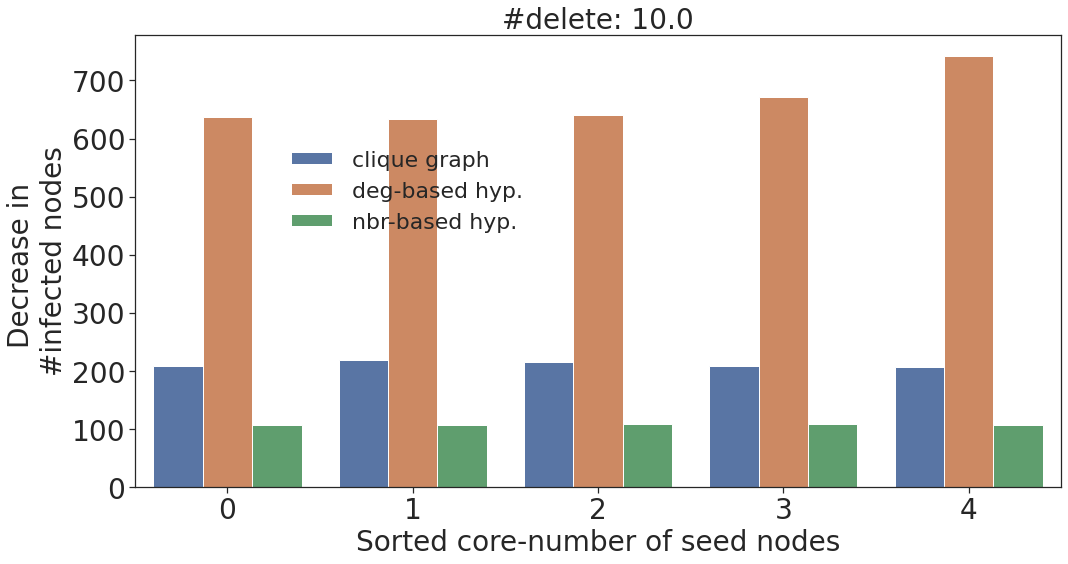

   core number_x  core number sorted  core number_y  infected difference  \
0             36                   4             24           453.150095   
1             37                   3             25           451.731333   
2             38                   2             26           441.871429   
3             39                   1             27           455.538421   
4             40                   0             28           453.491868   

  Decomposition  
0  clique graph  
1  clique graph  
2  clique graph  
3  clique graph  
4  clique graph  
   core number_x  core number sorted  core number_y  infected difference  \
0              7                   4              3           727.130000   
1              8                   3              4           692.628118   
2              9                   2              5           676.806667   
3             10                   1              6           662.008108   
4             11                   0              7    

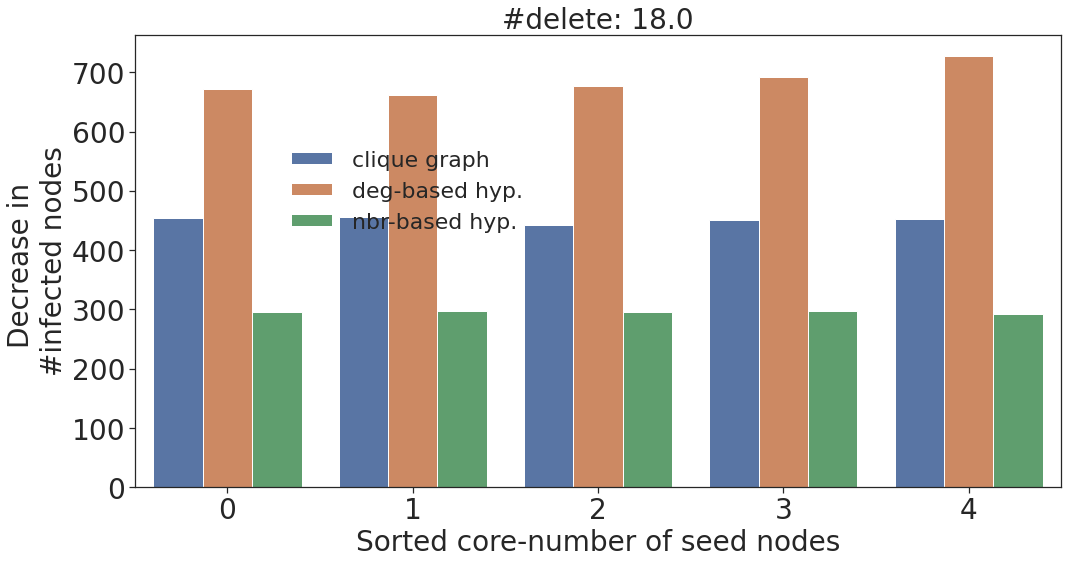

<Figure size 1080x576 with 0 Axes>

In [5]:
for num_delete in df['num delete'].unique():
    sns.set(rc={'figure.figsize': (15, 8)})
    sns.set_style("whitegrid", {'axes.grid': False})
    sns.set_style("ticks")
    # plt.style.use('grayscale')

    # from matplotlib.ticker import MaxNLocator
    # sns.set(rc={'figure.figsize': (7, 4)})
    # plt.rcParams['figure.figsize'] = (7,5)

    lw = 3
    save = False
    output_folder = '../fig/'
    topk = 5

    ignore_datasets = ['bin_1', 'bin_2', 'bin_4',
                       'bin_5', 'congress', 'contact']
    group_list = ['dataset', 'p', 'algo']
    goodname_algo = {
        'graph_core': 'clique graph',
        'naive_nbr': 'nbr-based hyp.',
        'naive_degree': 'deg-based hyp.'
    }
    order = [goodname_algo[a]
             for a in ['naive_nbr', 'graph_core', 'naive_degree']]
    df_plot = None

    for key, item in df[(df['intervention_results'].notnull()) & (df['num delete'] == num_delete)].groupby(group_list, as_index=False):

        # print(key)
        # print(item)
        # continue

        item['algo'] = item['algo'].replace(goodname_algo)
        assert len(item['algo'].unique()) == 1

        result = literal_eval(item['intervention_results'].iloc[0])

        result_df = pd.DataFrame()
        result_tuple = [('H'+str(hypergraph_id), k, v) for hypergraph_id in sorted(list(result.keys()))[:topk]
                        for k in result[hypergraph_id] for v in result[hypergraph_id][k]]
        result_df = result_df.append(pd.DataFrame(result_tuple, columns=[
            'hypergraph', 'core number', 'infected']), ignore_index=False)
        # Plot mean
        meandf = result_df.groupby(
            ['hypergraph', 'core number']).mean().reset_index()

        # sorting in descending order of core number
        meandf['core number sorted'] = meandf.apply(
            lambda x: list(-np.sort(-meandf[meandf['hypergraph'] == x['hypergraph']]['core number'])).index(x['core number']), axis=1)
        # print(meandf)
        merged_df = pd.merge(meandf[meandf['hypergraph'] == "H0"], meandf[meandf['hypergraph'] == "H1"],
                             how="right", on=["core number sorted"])
        merged_df['infected difference'] = merged_df.apply(
            lambda x: x['infected_x'] - x['infected_y'], axis=1)
        merged_df['Decomposition'] = goodname_algo[key[2]]

        merged_df.drop(['infected_x', 'infected_y', 'hypergraph_x',
                        'hypergraph_y'], axis=1, inplace=True)

        print(merged_df)

        if(df_plot is None):
            df_plot = merged_df.copy()
        else:
            df_plot = df_plot.append(merged_df, ignore_index=True)

    # # print(df_plot.head(10))
    # sns.lineplot(x='core number', y='infected difference',
    #              style='Decomposition', lw=lw, data=df_plot, style_order=order)
    sns.barplot(x='core number sorted', y='infected difference',
                hue='Decomposition', data=df_plot)
    plt.xlabel('Sorted core-number of seed nodes', fontsize=fontsize)
    plt.ylabel("Decrease in \n#infected nodes", fontsize=fontsize)
    plt.xticks(fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    plt.title("#delete: " + str(num_delete), fontsize=fontsize)
    leg = plt.legend(loc="best", fontsize=fontsize-6,
                     frameon=False, bbox_to_anchor=(0.44, 0.52))
    for legobj in leg.legendHandles:
        legobj.set_linewidth(4.0)

    plt.tight_layout()
    filename = key[0] + "_diff_btn_H0_and_H1_" + str(num_delete)
    # print(filename)
    # print(output_folder)
    if(save):
        plt.savefig(output_folder + filename + ".pdf")
        plt.show()
    else:
        print(filename)
        plt.show()
        # break
    plt.clf()


In [16]:
df_plot

,core number_x,core number sorted,core number_y,infected difference,Decomposition
0,15,25,1,3617.0,clique graph
1,16,24,2,2087.0,clique graph
2,17,23,3,530.5,clique graph
3,18,22,4,543.0,clique graph
4,19,21,5,519.5,clique graph
5,20,20,6,524.0,clique graph
6,21,19,7,521.5,clique graph
7,22,18,8,526.0,clique graph
8,23,17,9,526.5,clique graph
9,24,16,10,522.0,clique graph


### Varying maximum propagation time

In [1]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
from ast import literal_eval
import shutil

output_folder = '../output/'

fontsize = 18
labelsize = 14

df = pd.read_csv(output_folder + "propagation_result.csv", header=None)
df.columns = ['algo', 'dataset', 'exp', 'intervention_results', 'max propagation time', 'p', 'result', 'timestep_results']
print(df.shape)
df.head(15)

(3, 8)


,algo,dataset,exp,intervention_results,max propagation time,p,result,timestep_results
0,naive_nbr,dblp,sir,NaN,100.0,0.3,"{279: [(7005, 284, [93, 187, 286, 370, 453, 53...",NaN
1,naive_degree,dblp,sir,NaN,100.0,0.3,"{13: [(2086, 28, [4, 5, 87, 94, 169, 171, 172,...",NaN
2,graph_core,dblp,sir,NaN,100.0,0.3,"{279: [(6731, 284, [83, 167, 258, 343, 433, 51...",NaN


dblp
('degree', 100.0, 'sir')
('nbr', 100.0, 'sir')
../fig/dblp_infected_100.0.pdf
100.0


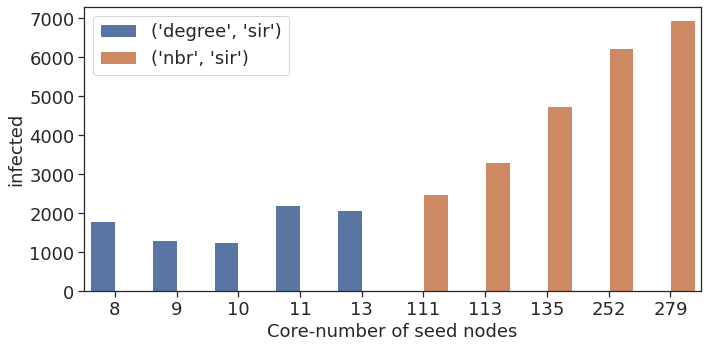

../fig/dblp_neighbors_100.0.pdf
100.0


<Figure size 720x360 with 0 Axes>

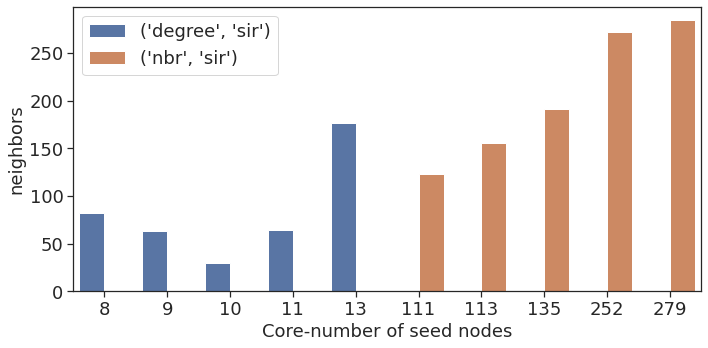

<Figure size 720x360 with 0 Axes>

In [10]:
import seaborn as sns
sns.set(rc={'figure.figsize': (10, 5)})
sns.set_style("ticks")
# plt.style.use('grayscale')
lw = 3
save = True

goodname_algo = {
    'naive_nbr': 'nbr',
    'naive_degree': 'degree'
}
df2 = df.copy()
# datasets = df['dataset'].unique()
# for key in datasets:
group_list = ['dataset']
for key, item in df2.groupby(group_list, as_index=False):
    print(key)
    # item = df2[df2.dataset==key].copy()
    # if len(item) == 0:
    #     continue
    item['algo'] = item['algo'].replace(goodname_algo)
    result_df = pd.DataFrame()
    group_list2 = ['algo', 'max propagation time', 'exp']
    for key2, item2 in item.groupby(group_list2, as_index=False):
        print(key2)
        # for algo in item['algo'].unique():
        #     for max_propagation_time in item[item['algo'] == algo]['max propagation time'].unique():
        #         print(item[(item['algo'] == algo) & (item['max propagation time'] == max_propagation_time)])
        assert item2.shape[0] == 1
        result = literal_eval(item2['result'].iloc[0])
        result = [(k[0], k[1], v[0], v[1], key2[0], key2[1], key2[2]) if isinstance(k, tuple) else
                  (k, -1, v[0], v[1], key2[0], key2[1], key2[2])
                  for k in result for v in result[k]]
        result_df = result_df.append(pd.DataFrame(result, columns=[
                                     'primary core number', 'secondary core number', 'infected', 'neighbors', 'algo', 'max propagation time', 'exp']), ignore_index=False)
        # print(result_df)
    # print(result_df)
    result_df = result_df[result_df.groupby(['primary core number', 'exp', 'algo'])[
        'secondary core number'].transform('max') == result_df['secondary core number']]
    # print()
    # print(result_df)
    # continue
    # Plot mean
    for max_propagation_time in result_df['max propagation time'].unique():
        for y_var in ['infected', 'neighbors'][1:]:
            meandf = result_df[result_df['max propagation time'] == max_propagation_time].groupby(
                ['primary core number', 'algo', 'exp']).mean().reset_index()
            # print(meandf)
            fig, ax = plt.subplots()
            # sns.lineplot(x = 'core number', y = 'infected', hue='algo', hue_order = ['clique graph', 'nbr-based hyp.', 'deg-based hyp.'],
            #                 data=meandf, color='k', linewidth = lw)
            sns.barplot(x='primary core number', y=y_var, hue=meandf[['algo', 'exp']].apply(tuple, axis=1),
                        data=meandf)

            plt.xlabel('Core-number of seed nodes', fontsize=fontsize)
            plt.ylabel(y_var, fontsize=fontsize)
            plt.xticks(fontsize=fontsize)
            # plt.xticks()
            plt.yticks(fontsize=fontsize)
            # plt.xlim(35, 60)
            # plt.title(key + ", max propagation time:" + str(int(max_propagation_time)), fontsize=fontsize)
            # ax.get_legend().remove()
            # handles, labels = ax.get_legend_handles_labels()
            # ax.legend(handles=handles[1:], labels=labels[1:], fontsize=fontsize)
            # plt.title(key)
            # ax.yaxis.set_major_locator(MaxNLocator(5))
            # ax.xaxis.set_major_locator(MaxNLocator(5))
            plt.legend(loc='best', fontsize=fontsize)
            plt.tight_layout()
            filename = key
            if(save):
                plt.savefig("../fig/" + filename + "_" + y_var +
                            "_" + str(max_propagation_time) + ".pdf")
                print("../fig/" + filename + "_" + y_var +
                            "_" + str(max_propagation_time) + ".pdf")
                print(max_propagation_time)
                plt.show()
            else:
                print("../fig/" + filename + "_infected.pdf")
                plt.show()
            plt.clf()
        
    break


dblp


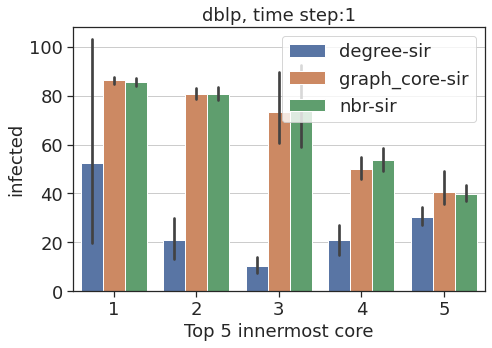

<Figure size 504x360 with 0 Axes>

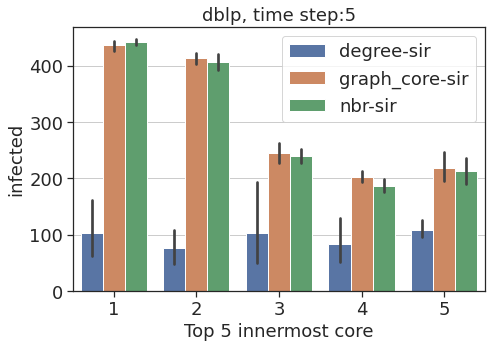

<Figure size 504x360 with 0 Axes>

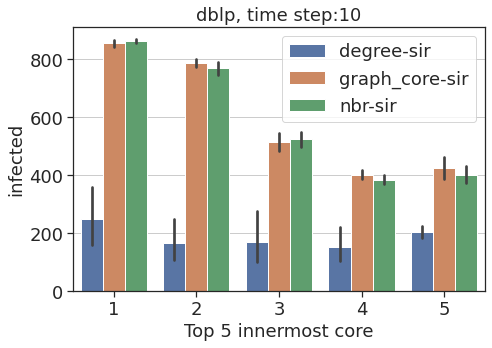

<Figure size 504x360 with 0 Axes>

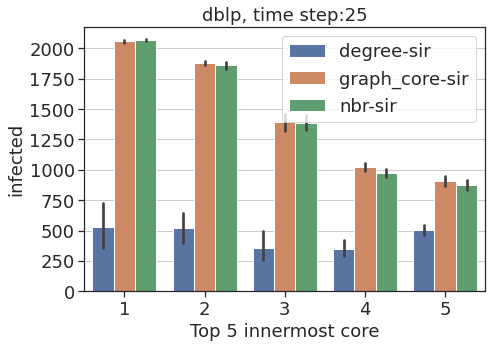

<Figure size 504x360 with 0 Axes>

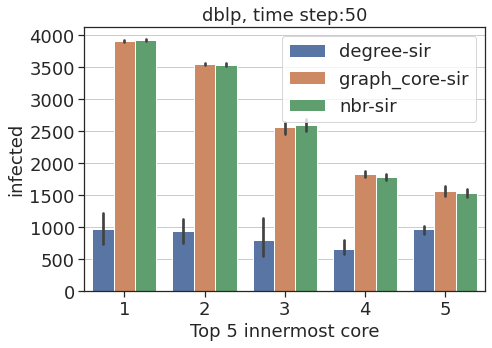

<Figure size 504x360 with 0 Axes>

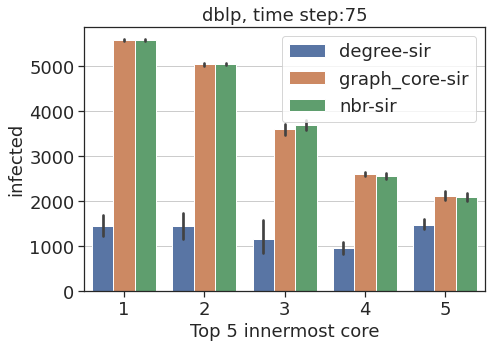

<Figure size 504x360 with 0 Axes>

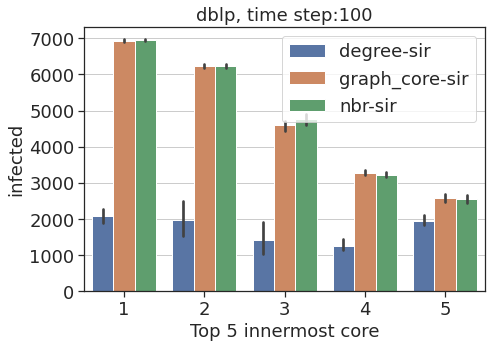

<Figure size 504x360 with 0 Axes>

In [18]:
import seaborn as sns
sns.set(rc={'figure.figsize': (7, 5)})
sns.set_style("ticks")
# plt.style.use('grayscale')
lw = 3
save = True

goodname_algo = {
    'naive_nbr': 'nbr',
    'naive_degree': 'degree'
}
df2 = df.copy()
# datasets = df['dataset'].unique()
# for key in datasets:
group_list = ['dataset']
for key, item in df2.groupby(group_list, as_index=False):
    print(key)
    # item = df2[df2.dataset==key].copy()
    # if len(item) == 0:
    #     continue
    item['algo'] = item['algo'].replace(goodname_algo)
    # result_df = pd.DataFrame()
    result_df = pd.DataFrame()
    group_list2 = ['algo', 'max propagation time', 'exp']
    for key2, item2 in item.groupby(group_list2, as_index=False):
        assert item2.shape[0] == 1
        result = literal_eval(item2['result'].iloc[0])
        result = [(k[0], k[1], v_time_detailed, key2[0] + "-" + key2[2], time_step + 1) if isinstance(k, tuple) else
                  (k, -1, v_time_detailed,
                   key2[0] + "-" + key2[2], time_step + 1)
                  for k in result for v in result[k] for time_step, v_time_detailed in enumerate(v[2])]
        result_df = result_df.append(pd.DataFrame(result, columns=[
                                     'primary core number', 'secondary core number', 'infected', 'algo-exp', 'time step']), ignore_index=False)
        # print(result_df)
    # print(result_df)
    result_df = result_df[result_df.groupby(['primary core number', 'algo-exp'])[
        'secondary core number'].transform('max') == result_df['secondary core number']]

    # print()
    # print(result_df)
    # continue
    # Plot mean
    # for time_step in result_df['time step'].unique():

    dic_sorted_core = {}
    for algo_exp in result_df['algo-exp'].unique():
        dic_sorted_core[algo_exp] = list(
            -np.sort(-result_df[result_df['algo-exp'] == algo_exp]['primary core number'].unique()))

    # print(dic_sorted_core)

    # continue
    for time_step in [1, 5, 10, 25, 50, 75, 100]:
        for y_var in ['infected']:
            # meandf = result_df[result_df['time step'] == time_step].groupby(
            #     ['primary core number', 'algo-exp']).mean().reset_index()
            # # sorting in descending order of core number
            # meandf['core number sorted'] = meandf.apply(
            #     lambda x: list(-np.sort(-meandf[meandf['algo-exp'] == x['algo-exp']]['primary core number'])).index(x['primary core number']), axis=1)
            # meandf['core number sorted'] = meandf.apply(lambda x: x['core number sorted'] + 1, axis=1)
            # # print(meandf)

            result_df['core number sorted'] = result_df.apply(
                lambda x: dic_sorted_core[x['algo-exp']].index(x['primary core number']), axis=1)
            result_df['core number sorted'] = result_df.apply(
                lambda x: x['core number sorted'] + 1, axis=1)

            fig, ax = plt.subplots()
            # sns.lineplot(x = 'core number', y = 'infected', hue='algo', hue_order = ['clique graph', 'nbr-based hyp.', 'deg-based hyp.'],
            #                 data=meandf, color='k', linewidth = lw)
            sns.barplot(x='core number sorted', y=y_var,
                        hue='algo-exp', data=result_df[result_df['time step'] == time_step])

            plt.xlabel('Top 5 innermost core', fontsize=fontsize)
            plt.ylabel(y_var, fontsize=fontsize)
            plt.xticks(fontsize=fontsize)
            # plt.xticks()
            plt.yticks(fontsize=fontsize)
            # plt.xlim(35, 60)
            plt.title(key + ", time step:" +
                      str(int(time_step)), fontsize=fontsize)
            plt.grid(axis='y')
            # ax.get_legend().remove()
            # handles, labels = ax.get_legend_handles_labels()
            # ax.legend(handles=handles[1:], labels=labels[1:], fontsize=fontsize)
            # plt.title(key)
            # ax.yaxis.set_major_locator(MaxNLocator(5))
            # ax.xaxis.set_major_locator(MaxNLocator(5))
            plt.legend(loc='best', fontsize=fontsize)
            # plt.ylim(0, 15)
            plt.tight_layout()
            filename = key
            if(save):
                plt.savefig("../fig/" + filename + "_" + y_var +
                            "_" + str(time_step) + ".pdf")
                plt.show()
            else:
                print("../fig/" + filename + "_infected.pdf")
                plt.show()
            plt.clf()

    break
